In [1]:
!pip install visualkeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 997.4/997.4 kB 15.8 MB/s eta 0:00:00


<img src="https://github.com/FarzadNekouee/Keras-CIFAR10-CNN-Model/blob/master/image.png?raw=true" width="1800">

<div style="border-radius:12px; padding: 20px; background-color: ##F5F5DC; font-size:125%; text-align:left">

<h2 align="left"><font color=#ffffff>CIFAR-10 Dataset</font></h2>

The __CIFAR-10__ dataset is a well-established benchmark in the field of machine learning, specifically designed for __image classification__. Comprising __60,000 color images__, each of __size 32x32 pixels__, the dataset is segmented into __10 distinct classes__, each representing a different object or creature. The classes encompass the following:

- Airplane
- Automobile
- Bird
- Cat
- Deer
- Dog
- Frog
- Horse
- Ship
- Truck

Each class contains an equal distribution, boasting 6,000 images. From the total image count, 50,000 are designated for training while the remaining 10,000 are set aside for testing.

</div>

<div style="border-radius:12px; padding: 20px; background-color: #E7E8D1; font-size:125%; text-align:left; color:#000000">

<h2 align="left"><font color=#000000>Objectives</font></h2>
    
* __Data Insights and Exploration__
   - Familiarize with the CIFAR-10 dataset.
   - Visually inspect sample images from various classes to understand data distribution.

    
* __Comprehensive Data Preprocessing__
   - Normalize pixel values of the images to enhance model training efficiency.
   - Convert image labels into a one-hot encoded format suitable for classification tasks.
   - Implement data augmentation techniques to increase the dataset's variability and improve model generalization.

    
* __Architectural Design using Keras__
   - Design a Convolutional Neural Network (CNN) tailored for the CIFAR-10 dataset using the __Keras__ framework.
   - Incorporate mechanisms such as dropouts and regularizations to counteract overfitting.

    
* __Model Training Process__
   - Train the CNN using the prepared dataset.
   - Utilize callbacks to adjust the learning rate dynamically and halt the training early if no improvements are detected, restoring the best model weights from the training.

    
* __Learning Analysis__
   - Visualize the model's accuracy, observing both training and validation performance metrics over epochs.

    
* __Model Evaluation__
   - Assess the trained model's accuracy and loss on the unseen test data to determine its robustness.

<a id="contents_tabel"></a>    
<div style="border-radius:10px; padding: 15px; background-color: #E7E8D1; font-size:125%; text-align:left; color:#000000">

<h2 align="left"><font color=#000000>Table of Contents</font></h2>
    
* [Step 1 | Import Necessary Libraries](#import)

* [Step 2 | Define CIFAR-10 Class: Model Building, Training, and Evaluation Pipeline](#cnn)

* [Step 3 | Data Preparation and Exploration and Preprocessing](#exploration)
    - [Step 3.1 | Normalization of Image Data]
    - [Step 3.2 | One-Hot Encoding of Labels]
    - [Step 3.3 | Data Augmentation]

* [Step 4 | Training the CNN Model](#train)
    - [Step 4.1 | Baseline Model](#baseline)
    - [Step 4.2 | Enhance Model](#enhanced)
        - [Step 4.2.3 | Implement Custom CallBacks](#callbacks)
    - [Step 4.3 | Best Model](#best)

* [Step 5 | Evaluating the Optimal Model on Test Data](#evaluation)
    - [Step 5.1 | Baseline Model Evaluation](#baselinee)
    - [Step 5.2 | Enhance Model Evaluation ](#enhancee)
    - [Step 5.3 | Best Model Evaluation ](#beste)

* [Step 6 | Visualizing the Learning Curves](#curves)
    - [Step 5.1 | Baseline Model Visualization & Confusion Matrix](#baselinev)
    - [Step 5.2 | Enhanced Model Visualization & Confusion Matrix](#enhacnev)
    - [Step 5.3 | Best Model Visualization & Confusion Matrix](#bestv)


<a id="import"></a>
# <p style="background-color:#E7E8D1; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px; color:#000000">Step 1 | Import Necessary Libraries</p>

⬆️ [Tabel of Contents](#contents_tabel)



<div style="border-radius:12px; padding: 20px; background-color: #E7E8D1; font-size:120%; text-align:left; color:#000000">

First, we're importing all the necessary libraries to kick off our project. We'll be relying on __TensorFlow__ and __Keras__ to handle the image data, craft our model, and optimize it for best performance:

In [2]:
# getting started with the model
# importing required libraries/packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix, classification_report

import seaborn as sns

import visualkeras
from PIL import ImageFont
from tensorflow.keras.datasets import cifar10

import warnings
warnings.filterwarnings('ignore')


In [3]:
print("Tensorflow version:",tf.__version__)
print("Keras version:",keras.__version__)

Tensorflow version: 2.18.0
Keras version: 3.8.0


<a id="cnn"></a>
# <p style="background-color:#E7E8D1; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px; color:#000000">Step 2 | Define the class with all necessary methods </p>

⬆️ [Tabel of Contents](#contents_tabel)



In [4]:
class CIFAR10Classifier:
    def __init__(self):
        self.class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                            'dog', 'frog', 'horse', 'ship', 'truck']
        self.num_classes = 10
        self.model = None
        self.history = None
        self.datagen = ImageDataGenerator(
            rotation_range=15,
            width_shift_range=0.1,
            height_shift_range=0.1,
            horizontal_flip=True,
            zoom_range=0.1
        )

    def load_and_preprocess_data(self):
        """Load and preprocess CIFAR-10 dataset"""
        # Load data
        (X_train, y_train), (X_test, y_test) = cifar10.load_data()

        # Split into train and validation
        X_train, X_val, y_train, y_val = train_test_split(
            X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
        )

        # Normalize pixel values
        X_train = X_train.astype('float32') / 255.0
        X_val = X_val.astype('float32') / 255.0
        X_test = X_test.astype('float32') / 255.0

        # One-hot encode labels
        y_train = to_categorical(y_train, self.num_classes)
        y_val = to_categorical(y_val, self.num_classes)
        y_test = to_categorical(y_test, self.num_classes)

        return (X_train, y_train), (X_val, y_val), (X_test, y_test)

    def display_data_summary(self, X_train, y_train, X_test, y_test, class_labels=None):
        """Prints dataset shape, displays sample images, and plots class distribution nicely."""

        # === Print Dataset Shapes ===
        print("\nDataset Summary:")
        print("=" * 30)
        print(f"🔹 X_train shape: {X_train.shape}")
        print(f"🔹 y_train shape: {y_train.shape}")
        print(f"🔹 X_test shape: {X_test.shape}")
        print(f"🔹 y_test shape: {y_test.shape}\n")

        # === Plot Sample Images ===
        fig, axes = plt.subplots(2, 5, figsize=(12, 5))
        fig.suptitle("Sample Training Images", fontsize=14, fontweight="bold")

        indices = np.random.choice(len(X_train), 10, replace=False)
        for i, idx in enumerate(indices):
            ax = axes[i // 5, i % 5]
            ax.imshow(X_train[idx], cmap="gray" if X_train.shape[-1] == 1 else None)
            ax.axis("off")
            # Get the original class label before one-hot encoding
            original_label = np.argmax(y_train[idx])
            ax.set_title(f"Label: {original_label}", fontsize=10)

        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()

        # === Class Distribution ===
        plt.figure(figsize=(8, 5))
        # Convert one-hot encoded labels back to original class labels for distribution plot
        original_labels = np.argmax(y_train, axis=1)
        class_counts = pd.Series(original_labels).value_counts().sort_index()

        sns.barplot(x=class_counts.index, y=class_counts.values, palette="coolwarm")
        plt.xlabel("Class Labels" if class_labels is None else "Class Names", fontsize=12)
        plt.ylabel("Frequency", fontsize=12)
        plt.title("Class Distribution in Training Data", fontsize=14, fontweight="bold")

        # Add percentage labels
        for i, v in enumerate(class_counts.values):
            plt.text(i, v + 5, f"{(v / len(y_train)) * 100:.1f}%", ha="center", fontsize=10, fontweight="bold")

        plt.xticks(range(len(class_counts)))
        plt.show()

    def build_model(self, architecture='baseline', learningRate=0.001):
        """Build CNN model with specified architecture"""
        tf.keras.backend.clear_session()

        if architecture == 'baseline':
            self.model = Sequential([
                Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
                MaxPooling2D((2, 2)),
                Conv2D(128, (3, 3), padding='same', activation='relu'),
                MaxPooling2D((2, 2)),
                Flatten(),
                Dense(128, activation='relu'),
                Dense(self.num_classes, activation='softmax')
            ], name='baseline_model')

        elif architecture == 'enhanced':
            self.model = Sequential([
                Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
                BatchNormalization(),
                Conv2D(32, (3, 3), padding='same', activation='relu'),
                BatchNormalization(),
                MaxPooling2D((2, 2)),
                Dropout(0.25),

                Conv2D(64, (3, 3), padding='same', activation='relu'),
                BatchNormalization(),
                Conv2D(64, (3, 3), padding='same', activation='relu'),
                BatchNormalization(),
                MaxPooling2D((2, 2)),
                Dropout(0.25),

                Conv2D(128, (3, 3), padding='same', activation='relu'),
                BatchNormalization(),
                Conv2D(128, (3, 3), padding='same', activation='relu'),
                BatchNormalization(),
                MaxPooling2D((2, 2)),
                Dropout(0.25),

                Flatten(),
                Dense(256, activation='relu'),
                BatchNormalization(),
                Dropout(0.5),
                Dense(self.num_classes, activation='softmax')
            ], name='enhanced_model')
        elif architecture == 'best_model':
          self.model= Sequential([
                # First convolutional block
                Conv2D(64, (4, 4), padding='same', activation='relu', input_shape=(32, 32, 3)),
                BatchNormalization(),
                Conv2D(64, (4, 4), padding='same', activation='relu'),
                BatchNormalization(),
                MaxPooling2D((2, 2)),
                Dropout(0.2),

                # Second convolutional block
                Conv2D(128, (4, 4), padding='same', activation='relu'),
                BatchNormalization(),
                Conv2D(128, (4, 4), padding='same', activation='relu'),
                BatchNormalization(),
                MaxPooling2D((2, 2)),
                Dropout(0.25),

                # Third convolutional block
                Conv2D(128, (4, 4), padding='same', activation='relu'),
                BatchNormalization(),
                Conv2D(128, (4, 4), padding='same', activation='relu'),
                BatchNormalization(),
                MaxPooling2D((2, 2)),
                Dropout(0.35),

                # Flatten and fully connected layers
                Flatten(),
                Dense(256, activation='relu'),
                BatchNormalization(),
                Dropout(0.5),
                Dense(10, activation='softmax')
            ], name='best_model')


        self.model.compile(optimizer=Adam(learning_rate=learningRate),  # Optimized learning rate
                         loss='categorical_crossentropy',
                         metrics=['accuracy'])

        return self.model

    def train_model(self, X_train, y_train, X_val, y_val, epochs=10, batch_size=32, use_datagen=False, callbacks=None):
        """Train the model with optional data augmentation"""
        if use_datagen:
            # Fit the model with data augmentation
            train_generator = self.datagen.flow(X_train, y_train, batch_size=batch_size)
            self.history = self.model.fit(
                train_generator,
                epochs=epochs,
                validation_data=(X_val, y_val),
                callbacks=callbacks,
                verbose=1
            )
        else:
            # Train the model without data augmentation
            self.history = self.model.fit(
                X_train, y_train,
                batch_size=batch_size,
                epochs=epochs,
                validation_data=(X_val, y_val),
                callbacks=callbacks,
                verbose=1
            )

        return self.history

    def evaluate_model(self, X_test, y_test):
        """Evaluate the model on test data"""
        test_loss, test_acc = self.model.evaluate(X_test, y_test, verbose=1)
        print(f"\nTest accuracy: {test_acc:.4f}")
        return test_loss, test_acc

    def plot_training_history(self, filename='training_curves.png'):
        """Plot training history"""
        plt.figure(figsize=(12, 4))

        plt.subplot(1, 2, 1)
        plt.plot(self.history.history['accuracy'])
        plt.plot(self.history.history['val_accuracy'])
        plt.title('Model accuracy')
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='lower right')

        plt.subplot(1, 2, 2)
        plt.plot(self.history.history['loss'])
        plt.plot(self.history.history['val_loss'])
        plt.title('Model loss')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='upper right')

        plt.tight_layout()
        plt.savefig(filename)
        plt.show()

    def k_fold_cross_validation(self, X, y, k=5, epochs=10, batch_size=32):
      """Performs k-fold cross-validation and returns average accuracy and loss"""
      kfold = KFold(n_splits=k, shuffle=True, random_state=42)
      fold_accuracies = []
      fold_losses = []

      for train_idx, val_idx in kfold.split(X):
          X_train, X_val = X[train_idx], X[val_idx]
          y_train, y_val = y[train_idx], y[val_idx]

          # Build a new model for each fold
          self.build_model()

          # Train the model
          history = self.model.fit(
              X_train, y_train,
              validation_data=(X_val, y_val),
              epochs=epochs,
              batch_size=batch_size,
              verbose=1
          )

          # Evaluate the model
          loss, accuracy = self.model.evaluate(X_val, y_val, verbose=0)
          fold_accuracies.append(accuracy)
          fold_losses.append(loss)

      avg_acc = np.mean(fold_accuracies)
      avg_loss = np.mean(fold_losses)

      print(f"\nAverage Accuracy: {avg_acc:.4f}")
      print(f"Average Loss: {avg_loss:.4f}")

      return avg_loss, avg_acc

    def plot_sample_data(self, X_train, y_train, num_samples=25, filename='sample_data.png'):
        """Plot sample training data"""
        plt.figure(figsize=(10, 10))
        for i in range(25):
            plt.subplot(5, 5, i+1)
            plt.xticks([])
            plt.yticks([])
            plt.grid(False)
            plt.imshow(X_train[i])
            plt.xlabel(self.class_names[np.argmax(y_train[i])])
        plt.show()

    def visualize_predictions(self, X_test, y_test, num_samples=25, filename='prediction_samples.png'):
        """Visualize predictions on test samples"""
        predictions = self.model.predict(X_test)
        predicted_classes = np.argmax(predictions, axis=1)
        true_classes = np.argmax(y_test, axis=1)

        plt.figure(figsize=(10, 10))
        for i in range(num_samples):
            plt.subplot(5, 5, i+1)
            plt.xticks([])
            plt.yticks([])
            plt.grid(False)
            plt.imshow(X_test[i])
            pred_label = self.class_names[predicted_classes[i]]
            true_label = self.class_names[true_classes[i]]
            color = 'green' if pred_label == true_label else 'red'
            plt.xlabel(f"{pred_label} ({true_label})", color=color)
        plt.savefig(filename)
        plt.show()

    def plot_confusion_matrix(self, X_test, y_test, filename='confusion_matrix.png'):
        """Plot confusion matrix"""
        predictions = self.model.predict(X_test)
        predicted_classes = np.argmax(predictions, axis=1)
        true_classes = np.argmax(y_test, axis=1)

        cm = confusion_matrix(true_classes, predicted_classes)
        plt.figure(figsize=(10, 8))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                   xticklabels=self.class_names, yticklabels=self.class_names)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title('Confusion Matrix')
        plt.savefig(filename)
        plt.show()

        print("\nClassification Report:")
        print(classification_report(true_classes, predicted_classes, target_names=self.class_names))


In [5]:

# Initialize classifier
clf = CIFAR10Classifier()

<a id="exploration"></a>
# <p style="background-color:#E7E8D1; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px; color:#000000">Step 3  | Data Preparation and Exploration and preprocessing</p>

⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:12px; padding: 20px; background-color: #E7E8D1; font-size:120%; text-align:left; color:#000000">

First, let's download the __CIFAR-10__ dataset from Keras library:

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


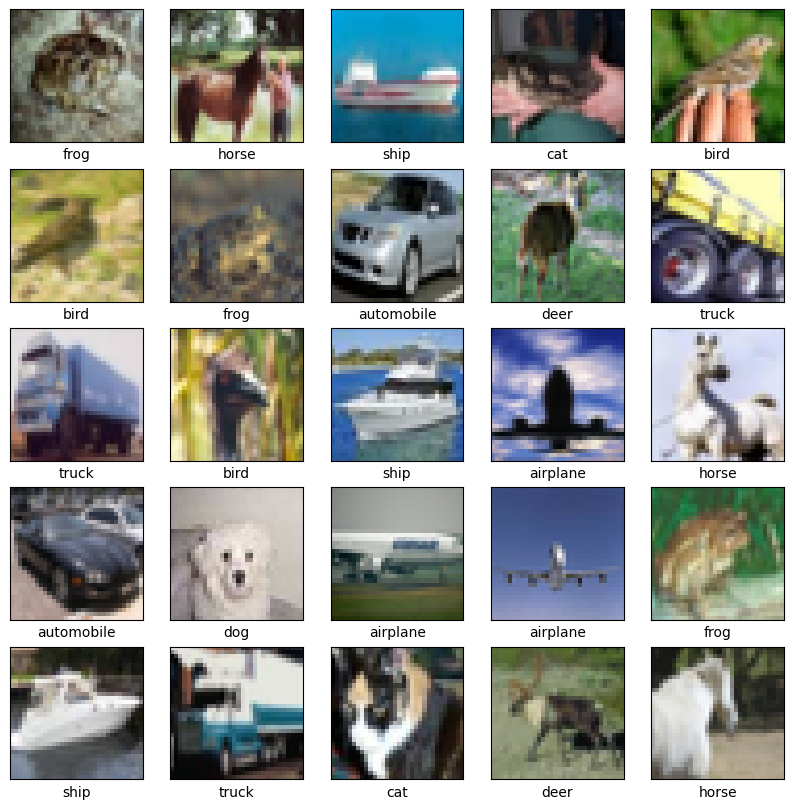

In [6]:
    # Load and preprocess data
(X_train, y_train), (X_val, y_val), (X_test, y_test) = clf.load_and_preprocess_data()
clf.plot_sample_data(X_train, y_train)

<div style="border-radius:12px; padding: 20px; background-color: #E7E8D1; font-size:120%; text-align:left; color:#000000">
    
Now, we're printing out the dimensions of our training, and test datasets in addition the validation data already splitted from training data :


Dataset Summary:
🔹 X_train shape: (40000, 32, 32, 3)
🔹 y_train shape: (40000, 10)
🔹 X_test shape: (10000, 32, 32, 3)
🔹 y_test shape: (10000, 10)



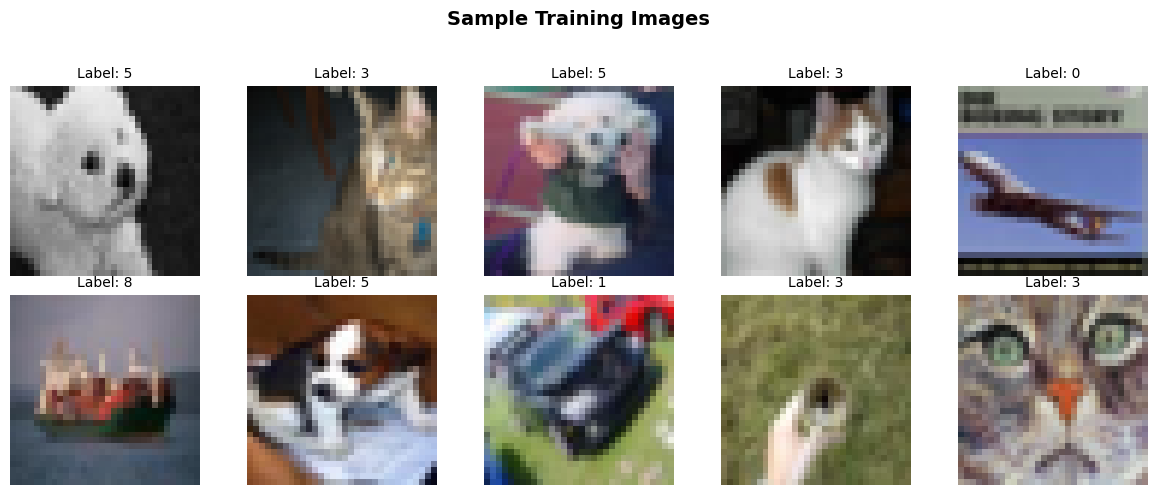

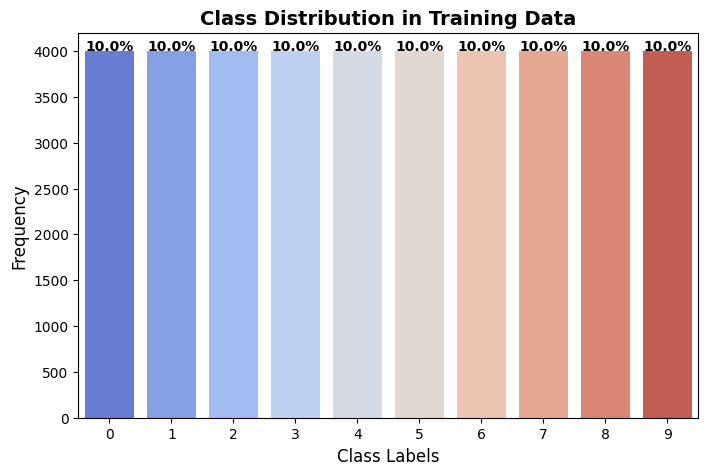

In [7]:
clf.display_data_summary(X_train, y_train , X_test, y_test)

<div style="border-radius:12px; padding: 20px; background-color: #E7E8D1; font-size:120%; text-align:left; color:#000000">
    
This function `build_model` constructs a Convolutional Neural Network (CNN) based on the specified architecture.
It supports three different architectures:

1. **Baseline**: A simple CNN with two convolutional layers followed by max pooling, flattening, and fully connected layers.
2. **Enhanced**: A deeper model with batch normalization, dropout for regularization, and additional convolutional layers.
3. **Best Model**: The most complex model, featuring deeper convolutional blocks, larger filters, and increased dropout for better generalization.

<a id="baseline"></a>
# <p style="background-color:#E7E8D1; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px; color:#000000">Now let's get started with the baseline model</p>

⬆️ [Tabel of Contents](#contents_tabel)


<div style="border-radius:12px; padding: 20px; background-color: #E7E8D1; font-size:120%; text-align:left; color:#000000">

#### 1. **Baseline Model**:
   - **Overview**: A simple CNN architecture to serve as a baseline for comparison.
   - **Architecture**:
     - **Conv2D** (64 filters, 3x3 kernel, ReLU activation): First convolutional layer to capture basic features.
     - **MaxPooling2D** (2x2 pool size): Reduces spatial dimensions.
     - **Conv2D** (128 filters, 3x3 kernel, ReLU activation): Second convolutional layer to capture more complex features.
     - **MaxPooling2D** (2x2 pool size): Further reduces dimensionality.
     - **Flatten**: Converts 2D feature maps to 1D vector.
     - **Dense** (128 units, ReLU activation): Fully connected layer.
     - **Dense** (10 units, Softmax activation): Output layer for 10-class classification.

In [8]:
clf.build_model(architecture='baseline' )  # or 'enhanced'or 'best_model'


<Sequential name=baseline_model, built=True>

<div style="border-radius:12px; padding: 20px; background-color: #E7E8D1; font-size:120%; text-align:left; color:#000000">


The `clf.model.summary()` function prints a detailed summary of the CNN architecture, including:

- **Layer types** (Conv2D, MaxPooling2D, Dense, etc.)
- **Output shapes** of each layer
- **Number of parameters** (trainable and non-trainable)
- **Total model parameters**, helping to assess complexity and computational requirements.
</div>


In [9]:
clf.model.summary()

Model: "baseline_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,048,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,125,642 (4.29 MB)

 Trainable params: 1,125,642 (4.29 MB)

 Non-trainable params: 0 (0.00 B)

<div style="border-radius:12px; padding: 20px; background-color: #E7E8D1; font-size:120%; text-align:left; color:#000000">


The `plot_model` function generates a visual representation of the CNN architecture and saves it as an image.

### Parameters:
- **`clf.model`**: The model to visualize.
- **`to_file='model_plot.png'`**: Saves the model diagram as `model_plot.png`.
- **`show_shapes=True`**: Displays the shape of inputs and outputs for each layer.
- **`show_layer_names=True`**: Displays the names of each layer.

</div>


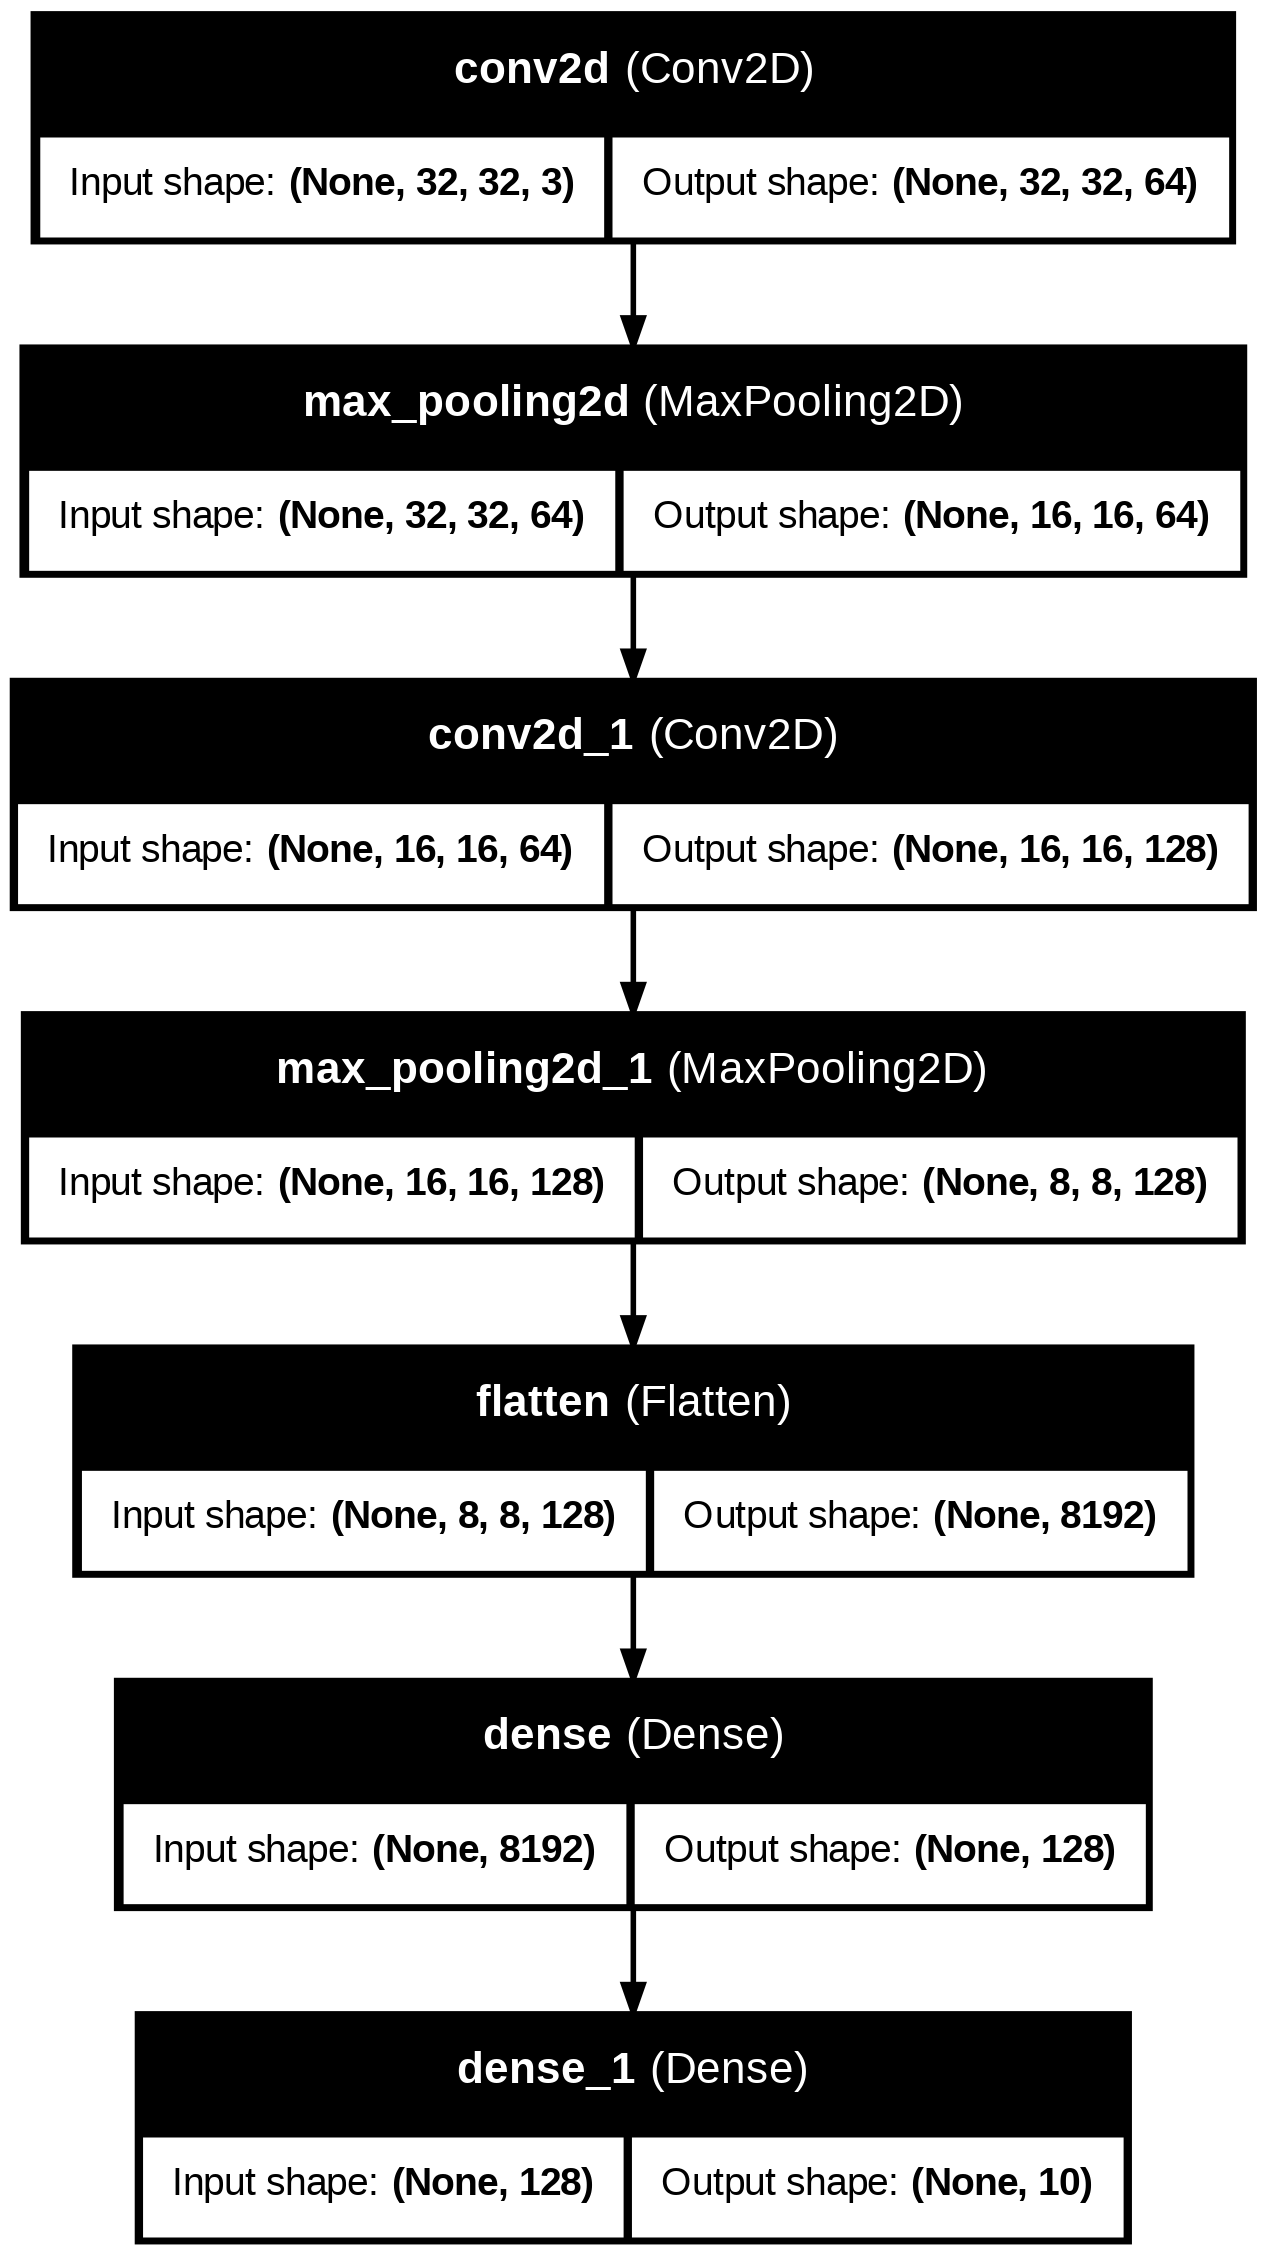

In [10]:
plot_model(clf.model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

<div style="border-radius:12px; padding: 20px; background-color: #E7E8D1; font-size:120%; text-align:left; color:#000000">

The `visualkeras.layered_view` function provides a visually intuitive representation of the CNN architecture.

### Parameters:
- **`clf.model`**: The model to visualize.
- **`legend=True`**: Displays a legend explaining the layer types.


</div>


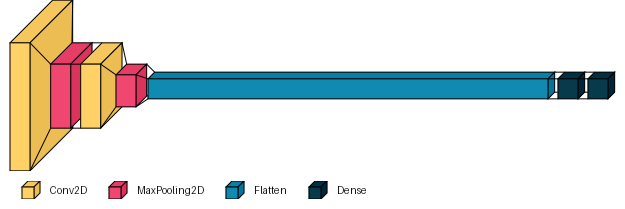

In [11]:
visualkeras.layered_view(clf.model, legend=True)

<a id="train"></a>
# <p style="background-color:#E7E8D1; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px; color:#000000">Step 4 | Training Phase </p>

⬆️ [Tabel of Contents](#contents_tabel)



<div style="border-radius:12px; padding: 20px; background-color: #E7E8D1; font-size:120%; text-align:left; color:#000000">


### Training the Baseline Model

The `clf.train_model` function trains the baseline CNN model using the provided training and validation data.

### Parameters:
- **`X_train, y_train`**: Training data and labels.
- **`X_val, y_val`**: Validation data and labels.
- **`epochs=10`**: Number of training epochs.
- **`batch_size=32`**: Number of samples per training batch.
- **`use_datagen=False`**: If `True`, enables data augmentation.
- **`callbacks=None`**: Optional callbacks for monitoring training progress.

### Training Options:
- If `use_datagen=True`, the model is trained using an augmented dataset generated by `self.datagen.flow()`.
- Otherwise, it trains with standard data using `self.model.fit()`.

This function returns `self.history`, which stores loss and accuracy metrics for analysis.


</div>


In [12]:
# Train model
clf.train_model(X_train, y_train, X_val, y_val, epochs=10, use_datagen=False)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.3942 - loss: 1.6657 - val_accuracy: 0.5902 - val_loss: 1.1698
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6243 - loss: 1.0634 - val_accuracy: 0.6565 - val_loss: 0.9881
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6900 - loss: 0.8819 - val_accuracy: 0.6806 - val_loss: 0.9290
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7286 - loss: 0.7653 - val_accuracy: 0.6974 - val_loss: 0.8821
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7682 - loss: 0.6561 - val_accuracy: 0.7040 - val_loss: 0.8805
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7965 - loss: 0.5814 - val_accuracy: 0.6891 - val_loss: 0.9168
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8257 - loss: 0.4949 - val_accuracy: 0.6989 - val_loss: 0.9501
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8542 - loss: 0.4213 

<div style="border-radius:12px; padding: 20px; background-color: #E7E8D1; font-size:120%; text-align:left; color:#000000">

### Evaluating the Baseline Model

The `clf.evaluate_model` function assesses the performance of the trained baseline CNN model on test data.

### Parameters:
- **`X_test, y_test`**: Test dataset and corresponding labels.

### Process:
- The function calls `self.model.evaluate()` to compute the **test loss** and **test accuracy**.
- The accuracy is then printed in a formatted output.

### Return Values:
- **`test_loss`**: The final loss value on the test dataset.
- **`test_acc`**: The final accuracy of the model on unseen data.



</div>


<a id="baselinee"></a>
# <p style="background-color:#E7E8D1; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px; color:#000000">Step 5.1 | BaseLine Model Evaluation</p>

⬆️ [Tabel of Contents](#contents_tabel)



In [13]:
clf.evaluate_model(X_test, y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6957 - loss: 1.1327

Test accuracy: 0.6968


(1.1486425399780273, 0.6967999935150146)

<a id="baselinev"></a>
# <p style="background-color:#E7E8D1; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px; color:#000000">Baseline Model Visualization</p>

⬆️ [Tabel of Contents](#contents_tabel)



<div style="border-radius:12px; padding: 20px; background-color: #E7E8D1; font-size:120%; text-align:left; color:#000000">


### Visualizing Baseline Model Performance

#### 1. Plot Training History
- The `clf.plot_training_history()` function generates accuracy and loss curves for both the training and validation sets.
- It helps assess model convergence and potential overfitting.

#### 2. Visualizing Predictions
- `clf.visualize_predictions(X_test, y_test)` selects **25 random samples** from the test set.
- Each image is displayed with its **predicted** and **true** labels.
- If the prediction is correct, the label is shown in **green**; otherwise, it's in **red**.

#### 3. Confusion Matrix
- `clf.plot_confusion_matrix(X_test, y_test)` creates a **heatmap** to show model performance across different classes.
- Helps in identifying misclassified instances.
- Additionally, it prints a **classification report** for more detailed insights.

</div>


⬆️ [Tabel of Contents](#contents_tabel)

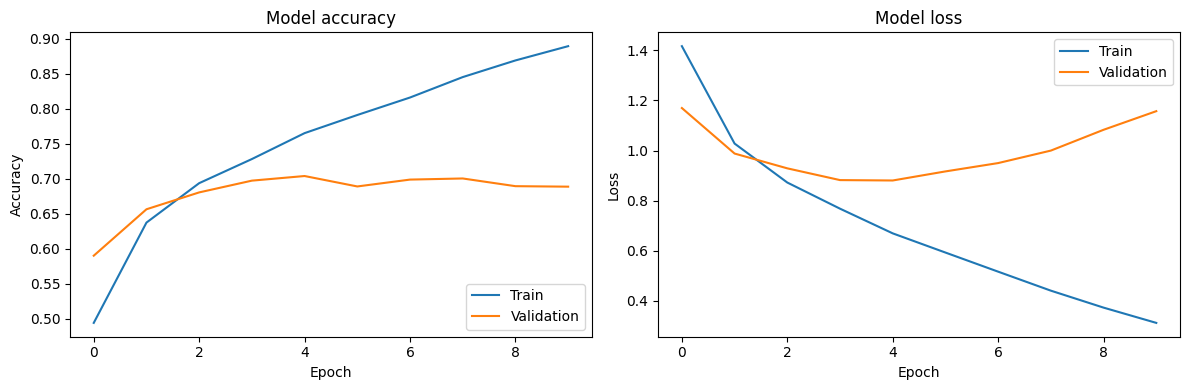

In [14]:
clf.plot_training_history()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


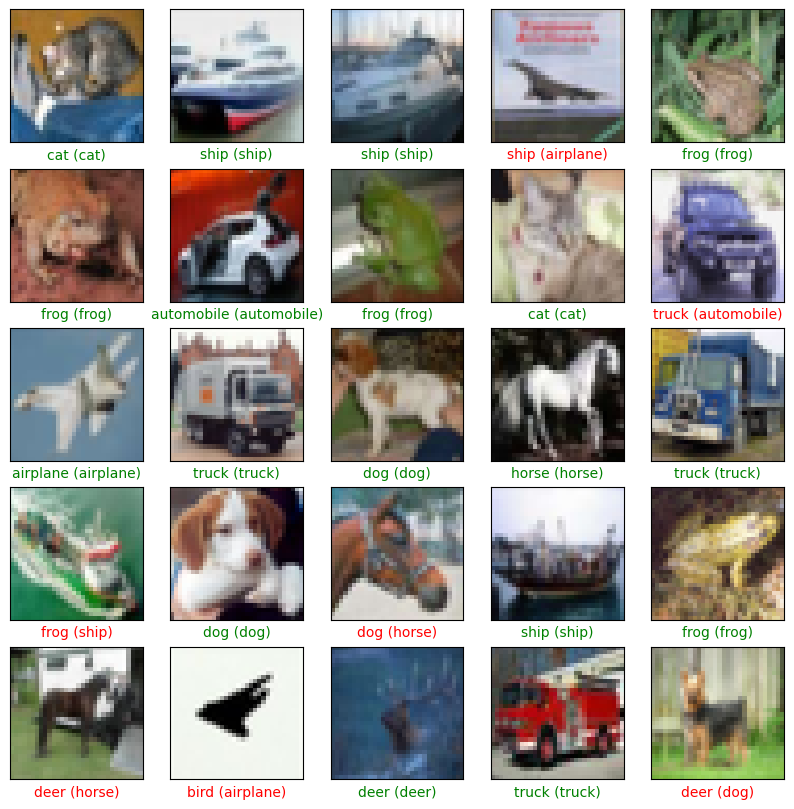

In [15]:
clf.visualize_predictions(X_test, y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


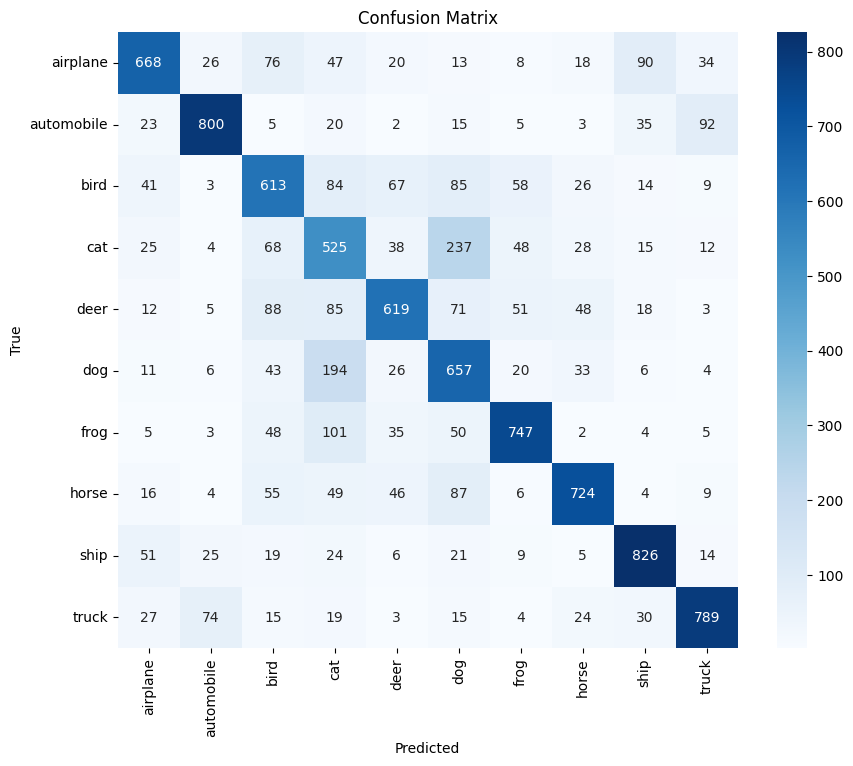


Classification Report:
              precision    recall  f1-score   support

    airplane       0.76      0.67      0.71      1000
  automobile       0.84      0.80      0.82      1000
        bird       0.60      0.61      0.60      1000
         cat       0.46      0.53      0.49      1000
        deer       0.72      0.62      0.66      1000
         dog       0.53      0.66      0.58      1000
        frog       0.78      0.75      0.76      1000
       horse       0.79      0.72      0.76      1000
        ship       0.79      0.83      0.81      1000
       truck       0.81      0.79      0.80      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000



In [16]:
clf.plot_confusion_matrix(X_test, y_test)

<a id="enhanced"></a>
# <p style="background-color:#E7E8D1; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px; color:#000000"> let's go further  with the enhanced model</p>

⬆️ [Tabel of Contents](#contents_tabel)



<div style="border-radius:12px; padding: 20px; background-color: #E7E8D1; font-size:120%; text-align:left; color:#000000">

#### 2. **Enhanced Model**:
   - **Overview**: A deeper and more regularized model with batch normalization and dropout to improve performance and prevent overfitting.
   - **Architecture**:
     - **Conv2D** (32 filters, 3x3 kernel, ReLU activation): Initial convolutional layer to capture features.
     - **BatchNormalization**: Helps stabilize and accelerate training.
     - **Conv2D** (32 filters, 3x3 kernel, ReLU activation): Second convolutional layer.
     - **MaxPooling2D** (2x2 pool size): Reduces spatial dimensions.
     - **Dropout** (0.25): Prevents overfitting by randomly setting a fraction of input units to 0.
     - **Conv2D** (64 filters, 3x3 kernel, ReLU activation): Deeper convolutional layer for more complex features.
     - **BatchNormalization**: Normalizes activations.
     - **Conv2D** (64 filters, 3x3 kernel, ReLU activation): Second convolutional layer at this depth.
     - **MaxPooling2D** (2x2 pool size): Reduces dimensions.
     - **Dropout** (0.25): Regularization to prevent overfitting.
     - **Conv2D** (128 filters, 3x3 kernel, ReLU activation): High-level feature extraction.
     - **BatchNormalization**: Normalizes activations.
     - **Conv2D** (128 filters, 3x3 kernel, ReLU activation): Second convolutional layer at this depth.
     - **MaxPooling2D** (2x2 pool size): Further reduces spatial dimensions.
     - **Dropout** (0.25): Reduces overfitting.
     - **Flatten**: Prepares feature map for fully connected layers.
     - **Dense** (256 units, ReLU activation): Fully connected layer.
     - **BatchNormalization**: Final normalization before output.
     - **Dropout** (0.5): Further regularization.
     - **Dense** (10 units, Softmax activation): Output layer for classification.

In [17]:
clf.build_model(architecture='enhanced' )  # or 'baseline'or 'best_model'

<Sequential name=enhanced_model, built=True>

In [18]:
clf.model.summary()

Model: "enhanced_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 816,938 (3.12 MB)

 Trainable params: 815,530 (3.11 MB)

 Non-trainable params: 1,408 (5.50 KB)

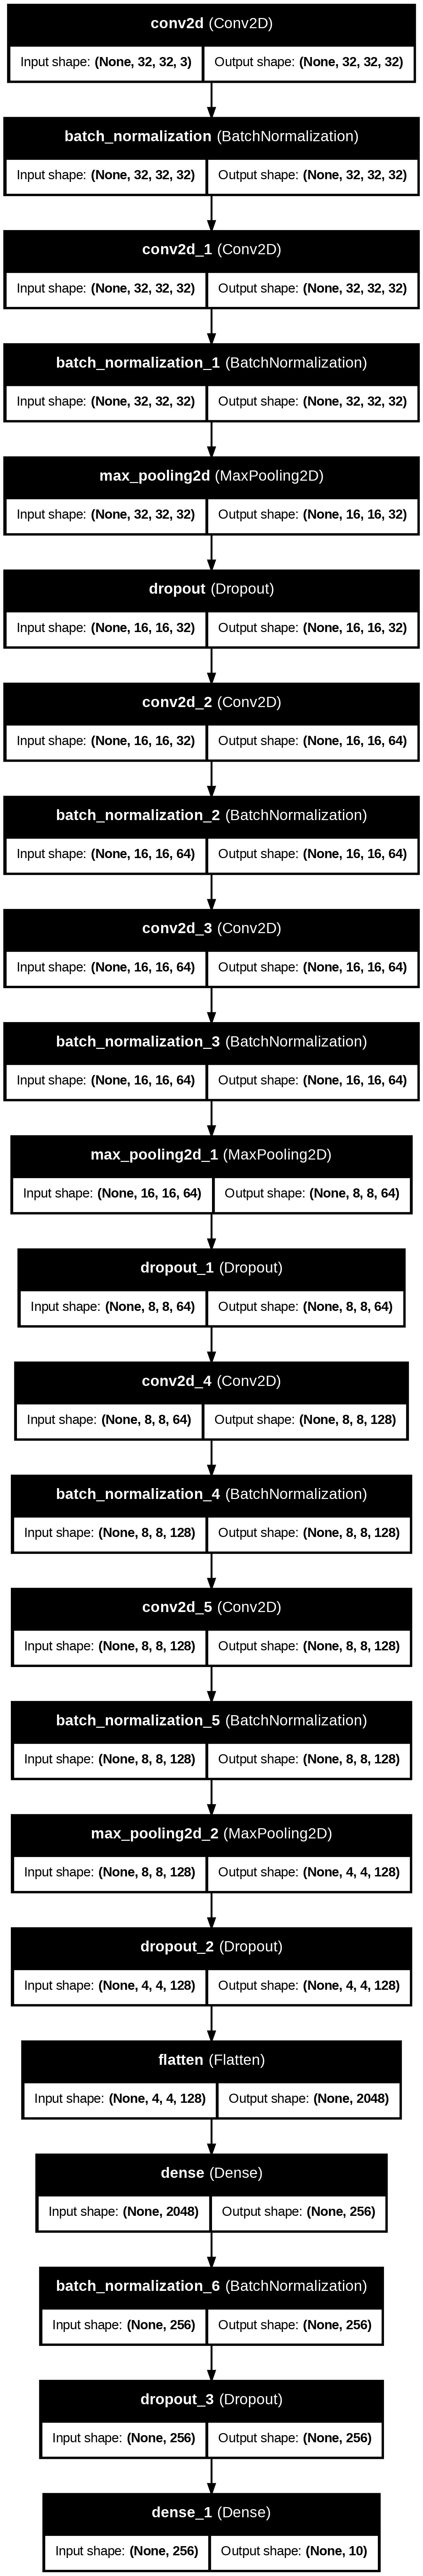

In [19]:
plot_model(clf.model, to_file='cnn_plot_enhance.png', show_shapes=True, show_layer_names=True)

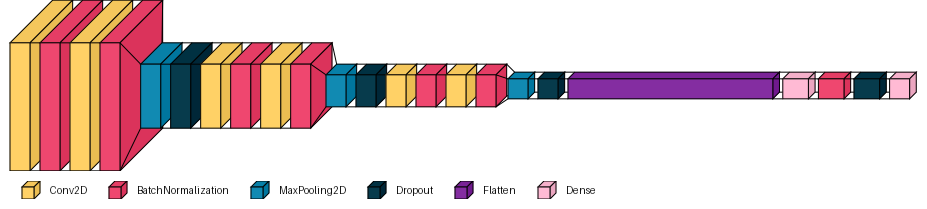

In [20]:
visualkeras.layered_view(clf.model, legend=True)

<a id="callbacks"></a>
# <p style="background-color:#E7E8D1; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px; color:#000000">Let's add more callbacks that will help us in training phase</p>

⬆️ [Tabel of Contents](#contents_tabel)



In [21]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

In [22]:
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    min_lr=0.00001,
    verbose=1
)

<div style="border-radius:12px; padding: 20px; background-color: #E7E8D1; font-size:120%; text-align:left; color:#000000">

### Increase the batch size from `32` to `64`
### Increase the epochs from `10` to `50`


In [23]:
batch_size = 64
epochs = 50

In [24]:
clf.train_model(X_train, y_train, X_val, y_val, epochs=epochs, batch_size=batch_size, use_datagen=True, callbacks=[early_stopping, reduce_lr])

Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 44ms/step - accuracy: 0.3192 - loss: 2.1651 - val_accuracy: 0.4862 - val_loss: 1.4668 - learning_rate: 0.0010
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.5303 - loss: 1.3042 - val_accuracy: 0.6341 - val_loss: 1.0670 - learning_rate: 0.0010
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.6174 - loss: 1.0924 - val_accuracy: 0.6554 - val_loss: 1.0316 - learning_rate: 0.0010
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.6582 - loss: 0.9717 - val_accuracy: 0.6868 - val_loss: 0.9090 - learning_rate: 0.0010
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 41ms/step - accuracy: 0.6828 - loss: 0.9127 - val_accuracy: 0.7235 - val_loss: 0.8053 - learning_rate: 0.0010
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.7078 - loss: 0.8399 - val_accuracy: 0.6732 - val_loss: 0.9939 - learning_rate: 0.0010
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.7229 - l

<a id="enhancee"></a>
# <p style="background-color:#E7E8D1; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px; color:#000000">Step 5.2 | Enhanced Model Evaluation</p>

⬆️ [Tabel of Contents](#contents_tabel)



In [25]:
clf.evaluate_model(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8704 - loss: 0.3963

Test accuracy: 0.8709


(0.39790454506874084, 0.8708999752998352)

<a id="enhacnev"></a>
# <p style="background-color:#E7E8D1; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px; color:#000000">Enhanced Model Visualization</p>

⬆️ [Tabel of Contents](#contents_tabel)



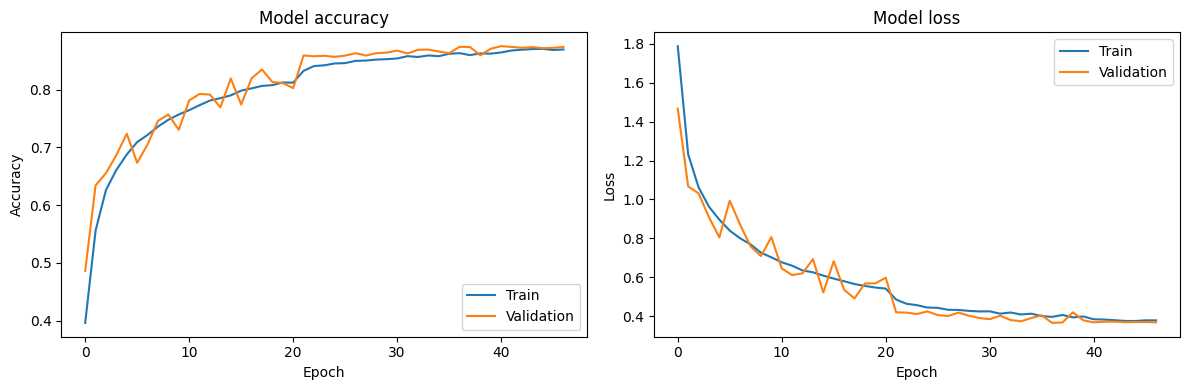

In [26]:
clf.plot_training_history()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


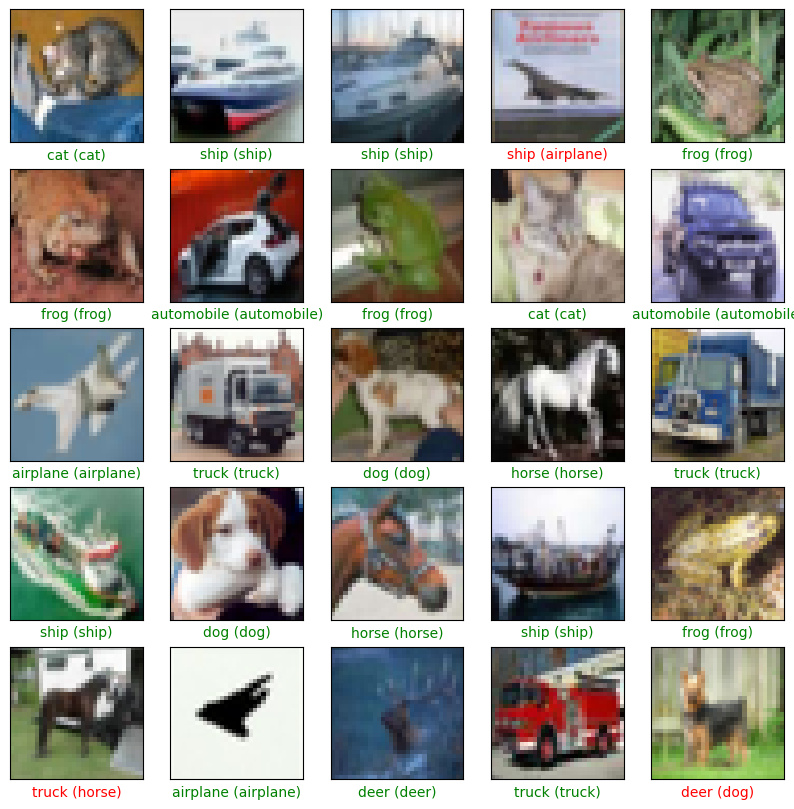

In [27]:
clf.visualize_predictions(X_test, y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


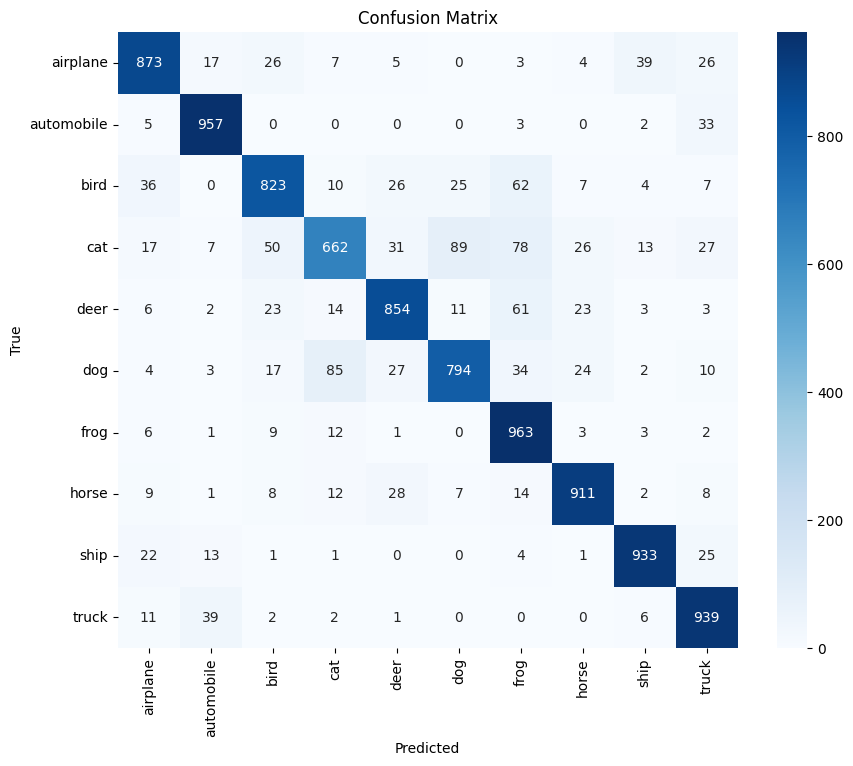


Classification Report:
              precision    recall  f1-score   support

    airplane       0.88      0.87      0.88      1000
  automobile       0.92      0.96      0.94      1000
        bird       0.86      0.82      0.84      1000
         cat       0.82      0.66      0.73      1000
        deer       0.88      0.85      0.87      1000
         dog       0.86      0.79      0.82      1000
        frog       0.79      0.96      0.87      1000
       horse       0.91      0.91      0.91      1000
        ship       0.93      0.93      0.93      1000
       truck       0.87      0.94      0.90      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [28]:
clf.plot_confusion_matrix(X_test, y_test)

<a id="best"></a>
# <p style="background-color:#E7E8D1; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px; color:#000000"> Our Final Model </p>

⬆️ [Tabel of Contents](#contents_tabel)



<div style="border-radius:12px; padding: 20px; background-color: #E7E8D1; font-size:120%; text-align:left; color:#000000">

#### 3. **Best Model**:
   - **Overview**: A highly optimized model with more convolutional blocks, dropout, and batch normalization to achieve the best performance.
   - **Architecture**:
     - **Conv2D** (64 filters, 4x4 kernel, ReLU activation): First convolutional block with larger kernel size for feature extraction.
     - **BatchNormalization**: Stabilizes the learning process.
     - **Conv2D** (64 filters, 4x4 kernel, ReLU activation): Second convolutional layer in the block.
     - **MaxPooling2D** (2x2 pool size): Reduces spatial dimensions.
     - **Dropout** (0.2): Prevents overfitting by randomly disabling units.
     - **Conv2D** (128 filters, 4x4 kernel, ReLU activation): Second convolutional block.
     - **BatchNormalization**: Normalizes activations for faster convergence.
     - **Conv2D** (128 filters, 4x4 kernel, ReLU activation): Second convolutional layer at this depth.
     - **MaxPooling2D** (2x2 pool size): Reduces the spatial dimensions.
     - **Dropout** (0.25): Regularization to prevent overfitting.
     - **Conv2D** (128 filters, 4x4 kernel, ReLU activation): Third convolutional block.
     - **BatchNormalization**: Helps stabilize learning.
     - **Conv2D** (128 filters, 4x4 kernel, ReLU activation): Second layer in the third block.
     - **MaxPooling2D** (2x2 pool size): Reduces dimensionality.
     - **Dropout** (0.35): Helps prevent overfitting.
     - **Flatten**: Converts 3D feature map to 1D vector for dense layers.
     - **Dense** (256 units, ReLU activation): Fully connected layer.
     - **BatchNormalization**: Final normalization before output.
     - **Dropout** (0.5): Further regularization to improve generalization.
     - **Dense** (10 units, Softmax activation): Output layer for 10-class classification.

In [29]:
clf.build_model(architecture='best_model' )  # or 'baseline'or 'enhanced'

<Sequential name=best_model, built=True>

In [30]:
clf.model.summary()

Model: "best_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 64)          │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 64)          │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 128)         │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 128)         │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 128)           │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 128)           │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,517,450 (5.79 MB)

 Trainable params: 1,515,658 (5.78 MB)

 Non-trainable params: 1,792 (7.00 KB)

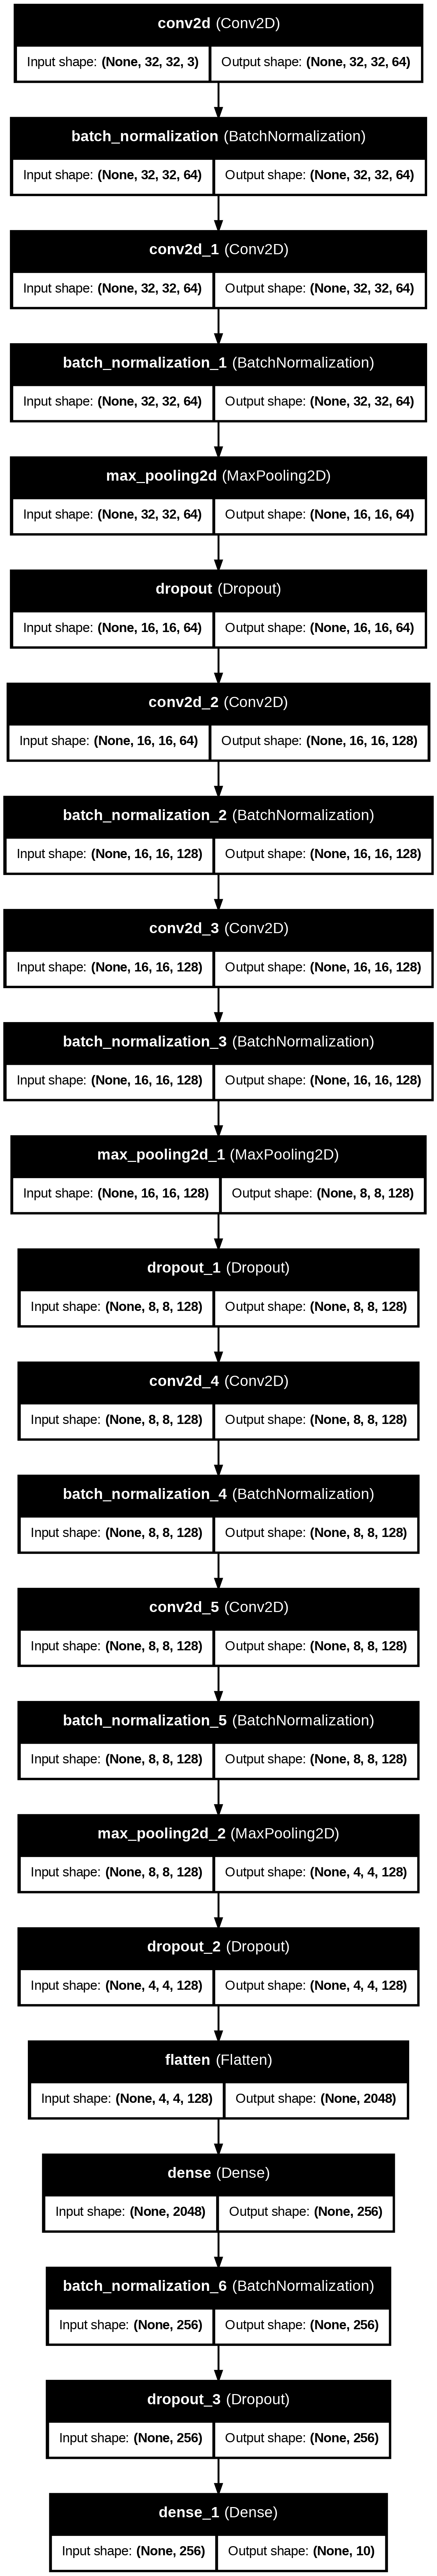

In [31]:
plot_model(clf.model, to_file='cnn_plot_enhance.png', show_shapes=True, show_layer_names=True)

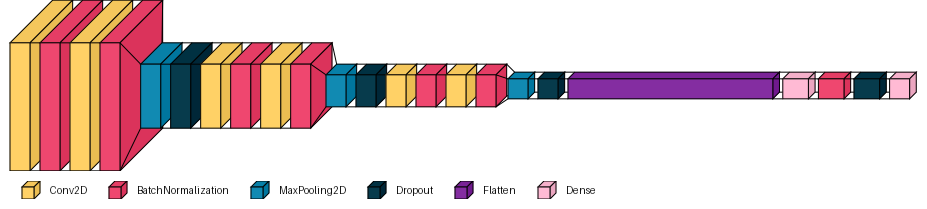

In [32]:
visualkeras.layered_view(clf.model, legend=True)

In [33]:
clf.train_model(X_train, y_train, X_val, y_val, epochs=epochs, batch_size=batch_size, use_datagen=True, callbacks=[early_stopping, reduce_lr])

Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 47ms/step - accuracy: 0.3060 - loss: 2.2304 - val_accuracy: 0.4949 - val_loss: 1.4443 - learning_rate: 0.0010
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 33s 47ms/step - accuracy: 0.5331 - loss: 1.3077 - val_accuracy: 0.5533 - val_loss: 1.3559 - learning_rate: 0.0010
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 46ms/step - accuracy: 0.6376 - loss: 1.0357 - val_accuracy: 0.6238 - val_loss: 1.1445 - learning_rate: 0.0010
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 60ms/step - accuracy: 0.6865 - loss: 0.8999 - val_accuracy: 0.6284 - val_loss: 1.1575 - learning_rate: 0.0010
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 28s 44ms/step - accuracy: 0.7205 - loss: 0.8123 - val_accuracy: 0.7431 - val_loss: 0.7562 - learning_rate: 0.0010
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 29s 46ms/step - accuracy: 0.7536 - loss: 0.7212 - val_accuracy: 0.7636 - val_loss: 0.6994 - learning_rate: 0.0010
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 47ms/step - accuracy: 0.7632 - l

<a id="beste"></a>
# <p style="background-color:#E7E8D1; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px; color:#000000">Step 5.3 | Best Model Evaluation</p>

⬆️ [Tabel of Contents](#contents_tabel)



In [34]:
clf.evaluate_model(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8844 - loss: 0.3587

Test accuracy: 0.8861


(0.3588734269142151, 0.8860999941825867)

<a id="bestv"></a>
# <p style="background-color:#E7E8D1; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px; color:#000000">Best Model Visualization</p>

⬆️ [Tabel of Contents](#contents_tabel)



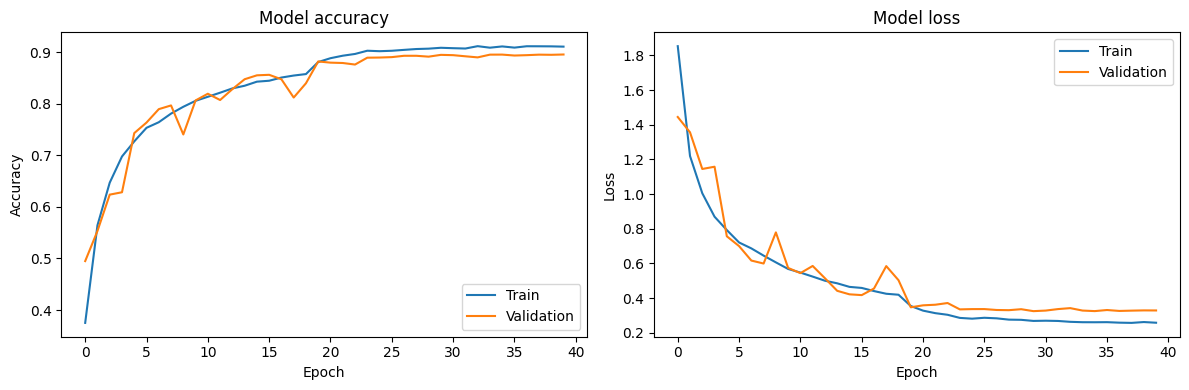

In [35]:
clf.plot_training_history()

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step


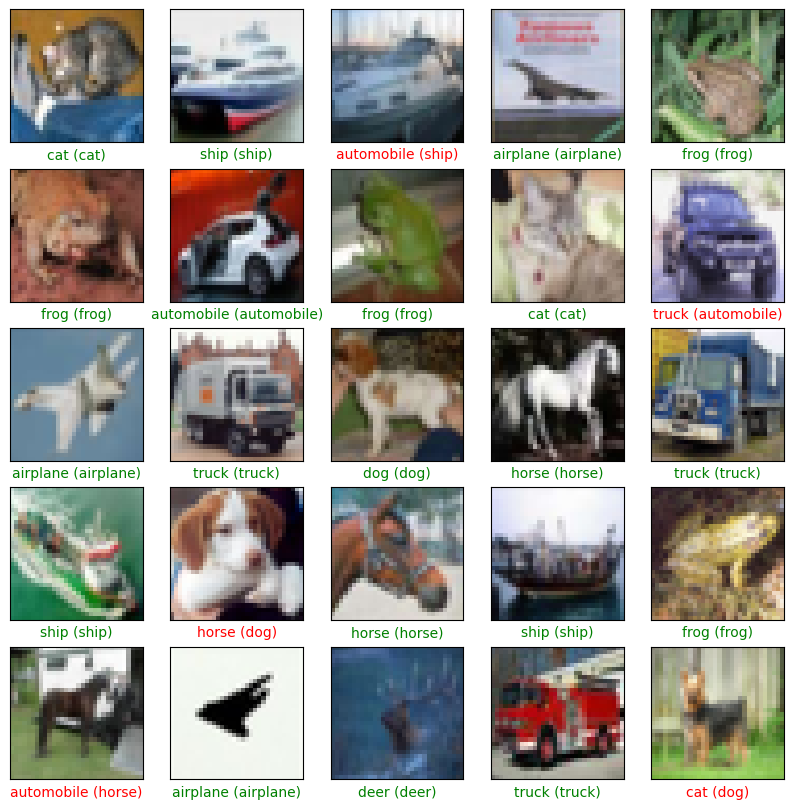

In [36]:
clf.visualize_predictions(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


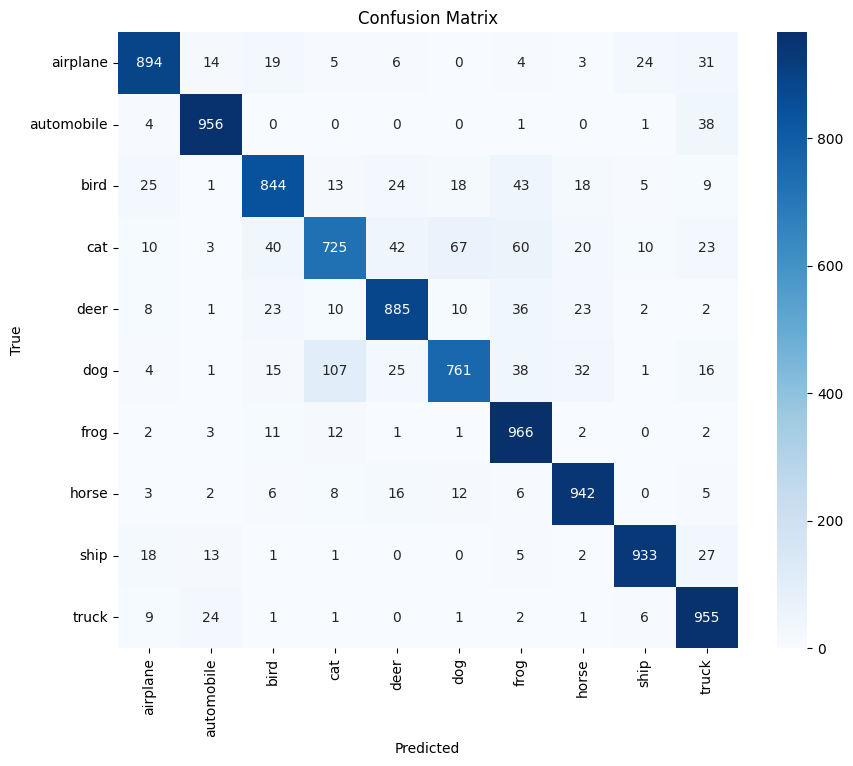


Classification Report:
              precision    recall  f1-score   support

    airplane       0.92      0.89      0.90      1000
  automobile       0.94      0.96      0.95      1000
        bird       0.88      0.84      0.86      1000
         cat       0.82      0.72      0.77      1000
        deer       0.89      0.89      0.89      1000
         dog       0.87      0.76      0.81      1000
        frog       0.83      0.97      0.89      1000
       horse       0.90      0.94      0.92      1000
        ship       0.95      0.93      0.94      1000
       truck       0.86      0.95      0.91      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.88     10000
weighted avg       0.89      0.89      0.88     10000



In [37]:
clf.plot_confusion_matrix(X_test, y_test)

In [38]:
clf.build_model(architecture='best_model' )

<Sequential name=best_model, built=True>

<div style="border-radius:12px; padding: 20px; background-color: #E7E8D1; font-size:120%; text-align:left; color:#000000">


### k-Fold Cross-Validation for the Baseline Model

The `clf.k_fold_cross_validation` function performs k-fold cross-validation on the Best CNN model, helping to evaluate its performance across different subsets of the dataset.

### Parameters:
- **`X, y`**: Features and labels of the dataset.
- **`k=5`**: Number of splits for cross-validation (5 by default).
- **`epochs=10`**: Number of epochs to train the model in each fold.
- **`batch_size=32`**: Number of samples per batch in each fold.

### Process:
1. The dataset is split into `k` folds using `KFold`.
2. For each fold, a new model is built and trained on the training subset and validated on the validation subset.
3. The model's loss and accuracy are evaluated for each fold, and results are stored.

### Return Values:
- **`avg_loss`**: The average loss across all folds.
- **`avg_acc`**: The average accuracy across all folds.


</div>

In [39]:
clf.k_fold_cross_validation(X_train, y_train, k=5, epochs=10, batch_size=batch_size)

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.3522 - loss: 1.7644 - val_accuracy: 0.5760 - val_loss: 1.2127
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.5796 - loss: 1.1839 - val_accuracy: 0.6288 - val_loss: 1.0530
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6546 - loss: 0.9909 - val_accuracy: 0.6736 - val_loss: 0.9490
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7050 - loss: 0.8495 - val_accuracy: 0.6802 - val_loss: 0.9230
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7282 - loss: 0.7689 - val_accuracy: 0.6917 - val_loss: 0.9010
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7695 - loss: 0.6653 - val_accuracy: 0.6876 - val_loss: 0.9358
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7916 - loss: 0.5955 - val_accuracy: 0.6954 - val_loss: 0.9133
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8273 - loss: 0.5010 - val_accuracy: 0.

(1.0927324771881104, 0.6983750104904175)